In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('speed_dating_data.csv', encoding = "ISO-8859-1")

In [4]:
df.gender.value_counts()

1    4194
0    4184
Name: gender, dtype: int64

Dropped due to too many missing values:<br>
min SAT (5245)<br>
income (4099)<br>

In [8]:
df2 = pd.concat([df.iid,
                 df.gender,
                 df.age,
                 df.field_cd,
                 df.goal,
                 df.date,
                 df.go_out,
                 df.career_c,
                 df.loc[:, 'sports':'yoga'],
                 df.exphappy,
                 df.expnum,
                 df.loc[:, 'attr1_1':'shar1_1'],  # what you look for
                 df.loc[:, 'attr4_1':'shar4_1'],  # what fellow men/women look for
                 df.loc[:, 'attr2_1':'shar2_1'],  # what opposite sex look for
                 df.loc[:, 'attr3_1':'amb3_1'],  # self eval
                 df.loc[:, 'attr5_1':'amb5_1']  # what others think of you
                ], axis=1)

# df2.info()

In [9]:
df2.drop_duplicates(inplace=True)

In [10]:
# Make values more readable
df2.gender.replace([0,1], ['Female', 'Male'], inplace=True)

# df2.goal.fillna('Missing')
df2.goal.replace([1, 2, 3, 4, 5, 6], 
                 ['Fun Night Out', 'Meet New People', 'Get a Date', 'Serious Relationship', '"To Say I Did It"', 'Other'], 
                 inplace=True)

In [11]:
df2.field_cd.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 
                     ['Law', 'Natural Sciences', 'Social Science', 'Medicine', 'Engineering', 'English/Journalism', 'Humanities', 'Business/Economics', 'Education', 'Natural Sciences', 'Other', 'Undecided', 'Political Science', 'Arts', 'Arts', 'Humanities', 'Architecture', 'Other'],
                     inplace=True)

In [12]:
# df2.career_c.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
#                      ['Lawyer', 'Academic', 'Psychologist', 'Doctor', 'Engineer', 'Creative Arts', 'Business', 'Real Estate', 'International Affairs', 'Undecided', 'Social Work', 'Speech Pathology', 'Politics', 'Sports', 'Other', 'Journalism', 'Architecture']
#                     )
# df2.goal

In [13]:
df2.goal.isnull().sum()

7

[Text(0,0,'"To Say I Did It"'),
 Text(0,0,'Fun Night Out'),
 Text(0,0,'Meet New People'),
 Text(0,0,'Get a Date'),
 Text(0,0,'Serious Relationship')]

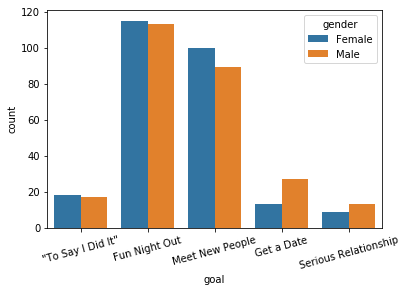

In [79]:
goal_plot = sns.countplot(x='goal', hue='gender', data=df2, 
                          order=['"To Say I Did It"', "Fun Night Out", "Meet New People", "Get a Date", "Serious Relationship"])
goal_plot.set_xticklabels(goal_plot.get_xticklabels(), rotation=15)

[Text(0,0,'sports'),
 Text(0,0,'tvsports'),
 Text(0,0,'exercise'),
 Text(0,0,'dining'),
 Text(0,0,'museums'),
 Text(0,0,'art'),
 Text(0,0,'hiking'),
 Text(0,0,'gaming'),
 Text(0,0,'clubbing'),
 Text(0,0,'reading'),
 Text(0,0,'tv'),
 Text(0,0,'theater'),
 Text(0,0,'movies'),
 Text(0,0,'concerts'),
 Text(0,0,'music'),
 Text(0,0,'shopping'),
 Text(0,0,'yoga')]

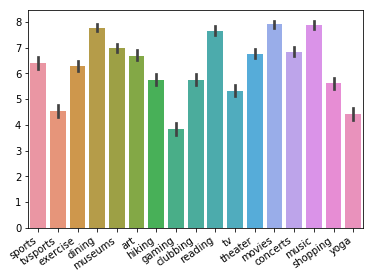

In [80]:
interests_plot = sns.barplot(data=df2.loc[:, 'sports':'yoga'])
interests_plot.set_xticklabels(interests_plot.get_xticklabels(), ha='right', rotation=35)

F:\Programs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


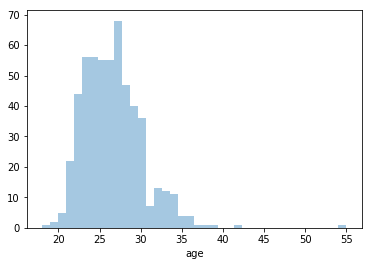

In [81]:
# sns.countplot(x='age', data=df2)
age_plot = sns.distplot(a=df2[df2['age'].notnull()].age, kde=False)

[Text(0,0,'Law'),
 Text(0,0,'Natural Sciences'),
 Text(0,0,'Political Science'),
 Text(0,0,'Business/Economics'),
 Text(0,0,'Engineering'),
 Text(0,0,'Education'),
 Text(0,0,'Social Science'),
 Text(0,0,'Other'),
 Text(0,0,'Undecided'),
 Text(0,0,'Medicine'),
 Text(0,0,'Humanities'),
 Text(0,0,'English/Journalism'),
 Text(0,0,'Arts'),
 Text(0,0,'Architecture')]

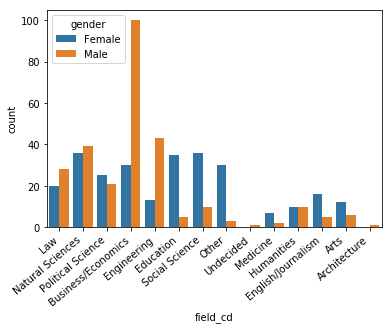

In [82]:
major_plot = sns.countplot(x='field_cd', hue='gender', data=df2)
major_plot.set_xticklabels(major_plot.get_xticklabels(), ha='right', rotation=40)

In [38]:
male_pref = []
for i in range(27, 33):
    male_pref.append(df2.loc[df2['gender']=='Male'].iloc[:, i].mean())
    
female_pref = []
for i in range(27, 33):
    female_pref.append(df2.loc[df2['gender']=='Female'].iloc[:, i].mean())
print(male_pref)
print(female_pref)

[27.248800000000006, 16.379600000000003, 19.38741818181818, 17.6008394160584, 8.823956043956043, 10.982271062271062]
[18.020371747211897, 18.222230483271375, 20.971003717472115, 17.299107806691453, 12.818475836431226, 12.697835820895522]


In [49]:
#https://matplotlib.org/gallery/specialty_plots/radar_chart.html

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [53]:
def example_data():
    data = [
        ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Has Shared Interests'],
        ('Stated', [
            male_pref, female_pref
        ]),
    ]
    return data

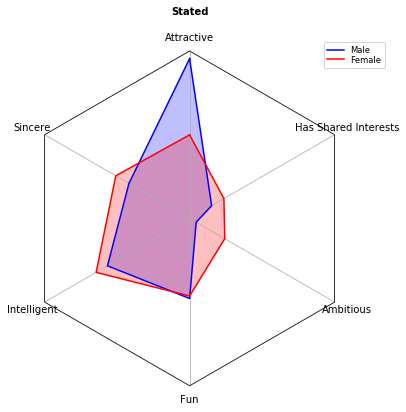

In [57]:
N = 6
theta = radar_factory(N, frame='polygon')

data = example_data()
spoke_labels = data.pop(0)

fig, ax = plt.subplots(figsize=(6, 6), nrows=1, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
# Plot the four cases from the example data on separate axes

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
             horizontalalignment='center', verticalalignment='center')
for d, color in zip(case_data, colors):
    ax.plot(theta, d, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.25)
ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
labels = ('Male', 'Female')
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

# fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
#          horizontalalignment='center', color='black', weight='bold',
#          size='large')

plt.show()
fig.savefig('preferences.png')

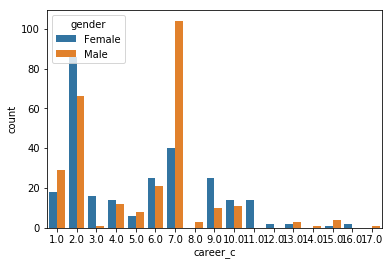

In [118]:
career_plot = sns.countplot(x='career_c', hue='gender', data=df2)

In [84]:
goal_plot.get_figure().savefig('goal.png', bbox_inches = "tight")
interests_plot.get_figure().savefig('interests.png', bbox_inches = "tight")
age_plot.get_figure().savefig('age.png', bbox_inches = "tight")
major_plot.get_figure().savefig('major.png', bbox_inches = "tight")